In [27]:
import logging
from kiteconnect import KiteConnect

logging.basicConfig(level=logging.DEBUG)

kite = KiteConnect(api_key="your_api_key")

# Redirect the user to the login url obtained
# from kite.login_url(), and receive the request_token
# from the registered redirect url after the login flow.
# Once you have the request_token, obtain the access_token
# as follows.

data = kite.generate_session("request_token_here", api_secret="your_secret")
kite.set_access_token(data["access_token"])

In [41]:
import datetime
starting_date=datetime.datetime(2019, 1, 1)
ending_date=datetime.datetime.today()

token = "738561" #Reliance Token 

zap=kite.historical_data(token,starting_date,ending_date,"day")
zap= pd.DataFrame(zap)
print(zap.head(10))

                       date     open     high      low    close   volume
0 2019-01-01 00:00:00+05:30  1072.60  1074.55  1058.15  1068.55  4674623
1 2019-01-02 00:00:00+05:30  1062.35  1074.25  1049.45  1054.60  7495774
2 2019-01-03 00:00:00+05:30  1055.65  1062.45  1039.05  1041.60  7812063
3 2019-01-04 00:00:00+05:30  1046.05  1052.75  1030.50  1047.25  8880762
4 2019-01-07 00:00:00+05:30  1055.20  1066.10  1049.45  1053.05  5784264
5 2019-01-08 00:00:00+05:30  1053.35  1058.00  1044.70  1052.95  5901337
6 2019-01-09 00:00:00+05:30  1059.95  1064.70  1047.30  1058.75  6049944
7 2019-01-10 00:00:00+05:30  1055.90  1059.00  1051.40  1055.65  4280617
8 2019-01-11 00:00:00+05:30  1055.75  1061.65  1037.65  1046.65  6781268
9 2019-01-14 00:00:00+05:30  1043.75  1049.00  1035.55  1045.45  4313662


In [51]:
def calculate_heikin_ashi(data):
    ha_close = (data['open'] + data['high'] + data['low'] + data['close']) / 4
    ha_open = (data['open'].shift(1) + data['close'].shift(1)) / 2
    ha_high = data[['high', 'close', 'open']].max(axis=1)
    ha_low = data[['low', 'close', 'open']].min(axis=1)

    ha_data = pd.DataFrame({'Date': data['date'], 'Open': ha_open, 'Close': ha_close, 'High': ha_high, 'Low': ha_low, 'Volume': data['volume']})

    return ha_data

# Assuming 'zap' is your DataFrame with OHLC data
zap_ashi = calculate_heikin_ashi(zap)

print(zap_ashi.head(10))

                       Date      Open      Close     High      Low   Volume
0 2019-01-01 00:00:00+05:30       NaN  1068.4625  1074.55  1058.15  4674623
1 2019-01-02 00:00:00+05:30  1070.575  1060.1625  1074.25  1049.45  7495774
2 2019-01-03 00:00:00+05:30  1058.475  1049.6875  1062.45  1039.05  7812063
3 2019-01-04 00:00:00+05:30  1048.625  1044.1375  1052.75  1030.50  8880762
4 2019-01-07 00:00:00+05:30  1046.650  1055.9500  1066.10  1049.45  5784264
5 2019-01-08 00:00:00+05:30  1054.125  1052.2500  1058.00  1044.70  5901337
6 2019-01-09 00:00:00+05:30  1053.150  1057.6750  1064.70  1047.30  6049944
7 2019-01-10 00:00:00+05:30  1059.350  1055.4875  1059.00  1051.40  4280617
8 2019-01-11 00:00:00+05:30  1055.775  1050.4250  1061.65  1037.65  6781268
9 2019-01-14 00:00:00+05:30  1051.200  1043.4375  1049.00  1035.55  4313662


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


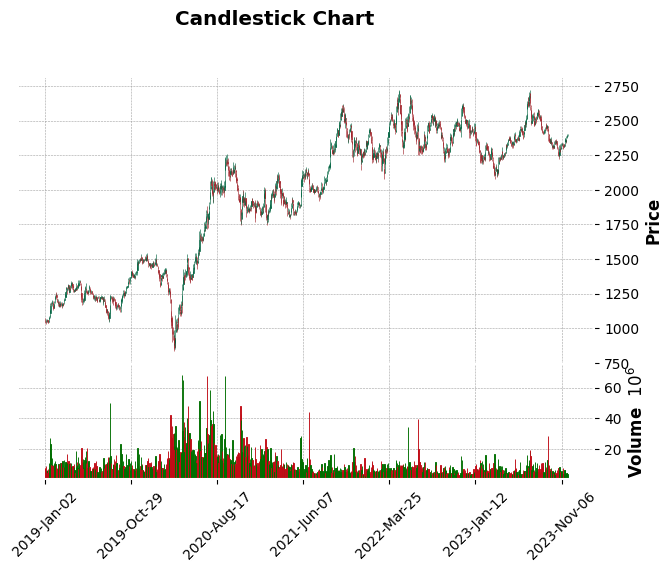

In [40]:
import pandas as pd
import mplfinance as mpf

# Remove rows with NaN values
zap_ashi.dropna(inplace=True)

# Assuming 'zap_ashi' is your DataFrame
# Convert the 'date' column to datetime and set it as index
zap_ashi['Date'] = pd.to_datetime(zap_ashi['Date'])
zap_ashi.set_index('Date', inplace=True)

# Plotting the candlestick chart
mpf.plot(zap_ashi, type='candle', style='charles', title="Candlestick Chart", volume=True)


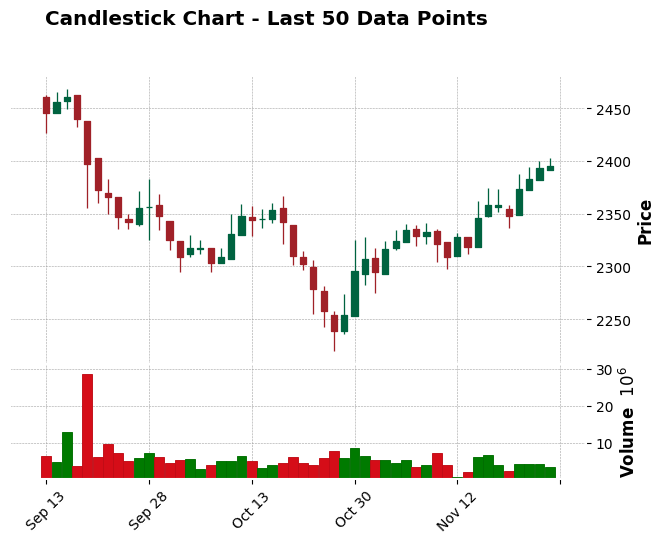

In [52]:
import pandas as pd
import mplfinance as mpf

# Assuming 'zap_ashi' is your DataFrame
# Convert the 'date' column to datetime and set it as index
zap_ashi['Date'] = pd.to_datetime(zap_ashi['Date'])
zap_ashi.set_index('Date', inplace=True)

# Slicing the DataFrame to get the last 50 rows
last_50_rows = zap_ashi.tail(50)

# Plotting the candlestick chart for the last 50 data points
mpf.plot(last_50_rows, type='candle', style='charles', title="Candlestick Chart - Last 50 Data Points", volume=True)
